In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [39]:
data = pd.read_csv("C:\DataScience\Assignment\Simple linear regression\delivery_time.csv")

In [40]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Exploring the descriptive statistics of the variables

In [41]:
data.describe(include = 'all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking data type

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Dealing with missing values

In [43]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for duplicated values

In [44]:
data[data.duplicated()].shape

(0, 2)

In [45]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [46]:
data_cleaned1=data.drop_duplicates()

In [47]:
data_cleaned1.shape

(21, 2)

### Rename the columns

In [48]:
data_cleaned2 = data_cleaned1.rename({'Delivery Time': 'Delivery_time', 'Sorting Time':'Sorting_time'}, axis=1)
data_cleaned2

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Exploring Probability Distribution Function (PDFs)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17600\3206529430.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_17600\3206529430.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='Sorting_time', ylabel='Density'>

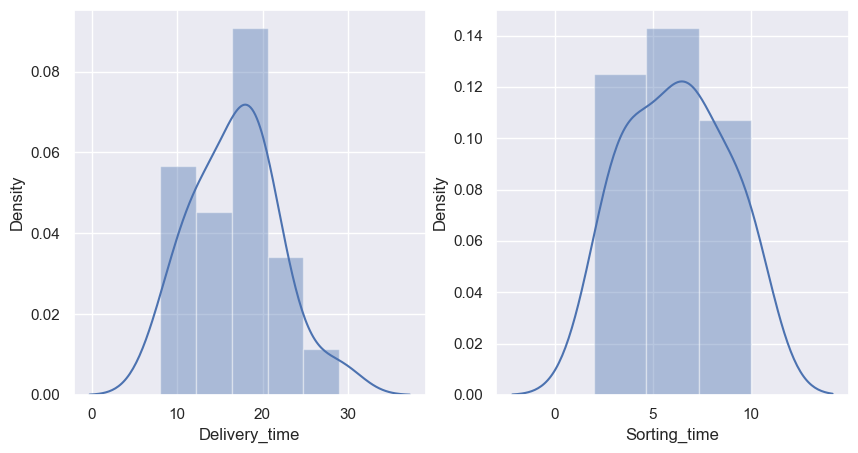

In [49]:
f,ax = plt.subplots(figsize=(10,5))
ax.remove()
sns.set_theme()
plt.subplot(1,2,1)
sns.distplot(
    data_cleaned2["Delivery_time"], kde=True,
)
plt.subplot(1,2,2)
sns.distplot(
    data_cleaned2["Sorting_time"], kde=True,
)

### Checking for Outliers with Boxplot

C:\Users\Admin\AppData\Local\Temp\ipykernel_17600\1586400058.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


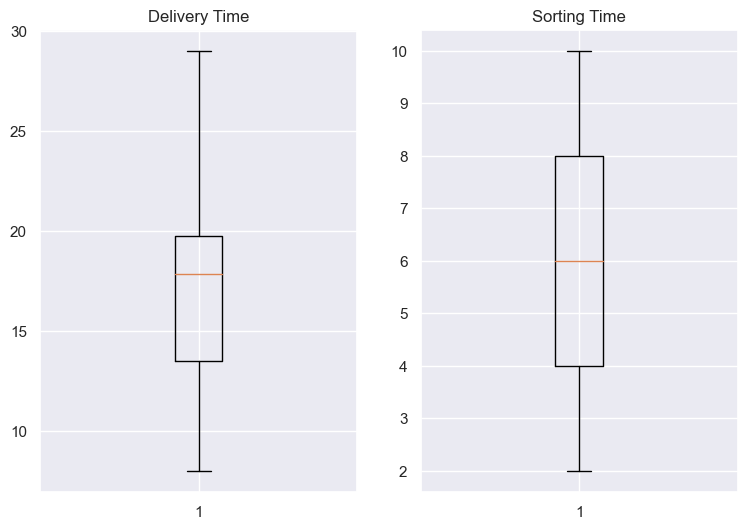

In [50]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.boxplot(data_cleaned2['Delivery_time'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(data_cleaned2['Sorting_time'])
plt.title('Sorting Time')
plt.show()

### <span style="color:red">As you can see above, there are no outliers in the data</span>

### Scatter Plot and Correlation between Variables.

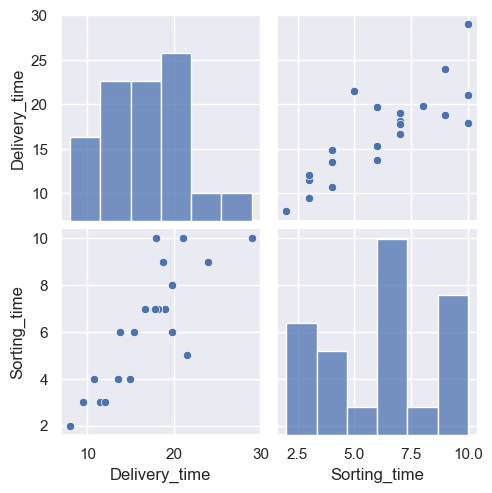

In [51]:
sns.pairplot(data_cleaned2)

In [52]:
data_cleaned2.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [53]:
data_cleaned2.var()

Delivery_time    25.754619
Sorting_time      6.461905
dtype: float64

### <span style="color:red">As you can see above </span>
     1.There are good correlation between two variables as score is more than 0.8
     2.The scatter plot shows as the sorting time increases delivery time also increases with much variation along the way.

### 1. Fitting Linear Regression Model(No Transformation)

In [54]:
model = smf.ols("Delivery_time~Sorting_time",data = data_cleaned2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        04:18:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

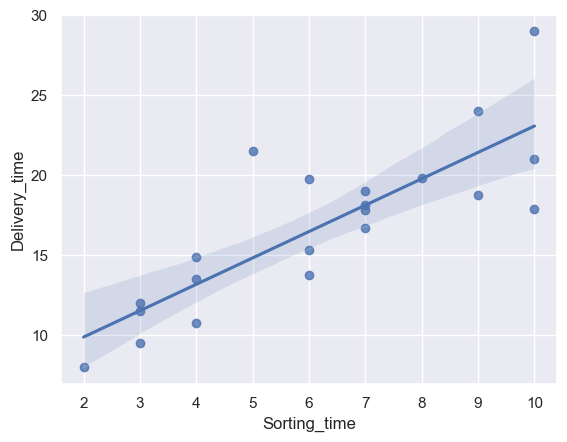

In [55]:
sns.regplot(x="Sorting_time", y="Delivery_time", data=data_cleaned2);

In [56]:
#Coefficients
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [57]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


In [58]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [59]:
#add new sorting time and Predict for delivery time 
new_data=pd.Series([5,11])

In [60]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,11


In [61]:
model.predict(data_pred)

0    14.827833
1    24.721953
dtype: float64

### 2 - Log Transformation of X

In [62]:
x = data_cleaned2['Sorting_time']
y = data_cleaned2['Delivery_time']
x_log = np.log(data_cleaned2['Sorting_time'])

In [63]:
model2 = sm.OLS(y, x_log).fit()
pred2 = model.predict(x_log)

In [64]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    1.48e-17
Time:                        04:18:49   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_time     9.6706      0.344     28.124      0.000       8.953      10.388
==============================================================================
Omnibus:                        3.656   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.164
Skew:                           0.772   Prob(JB):                        0.339
Kurtosis:                       3.298   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3 - Log Transformation of Y

In [68]:
x = data_cleaned2['Sorting_time']
y = data_cleaned2['Delivery_time']
y_log = np.log(data_cleaned2['Delivery_time'])

In [70]:
model3 = sm.OLS(y_log, x).fit()
pred3 = model3.predict(y_log)

In [31]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_time   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    3.00e-12
Time:                        04:15:48   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_time     0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4 - Log Transformation of X & Y

In [71]:
model4 = sm.OLS(y_log, x_log).fit()
pred4 = model.predict(x_log)

In [72]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    5.72e-17
Time:                        04:21:41   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5 - Square Root Transformation of X & Y

In [73]:
x_sqrt = np.sqrt(data_cleaned2['Sorting_time'])
y_sqrt = np.sqrt(data_cleaned2['Delivery_time'])
model5= sm.OLS(y_sqrt, x_sqrt).fit()
pred5 = model.predict(x_sqrt)

In [74]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery_time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    2.10e-20
Time:                        04:21:53   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting_time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
predicted5 = pd.DataFrame()
predicted5['Delivery_time'] = data_cleaned2.Delivery_time
predicted5['Sorting_time'] = data_cleaned2.Sorting_time
predicted5['Predicted_Delivery_time'] = pd.DataFrame(model5.predict(data_cleaned2.Sorting_time))
predicted5

,Delivery_time,Sorting_time,Predicted_Delivery_time
0,21.00,10,16.363533
1,13.50,4,6.545413
2,19.75,6,9.818120
3,24.00,9,14.727180
4,29.00,10,16.363533
5,15.35,6,9.818120
6,19.00,7,11.454473
7,9.50,3,4.909060
8,17.90,10,16.363533
9,18.75,9,14.727180


## 4 - Output Interpretation

We will use Model 5 as it has the best R square value

1 - p-value < 0.01

Thus the model is accepted


2 - coefficient == 1.64

Thus if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64



3 - Adj. R-sqared == 0.987

Thus the model explains 98.7% of the variance in dependent variable

In [36]:
print(predictions)

0     11.797393
1      9.880774
2     10.621991
3     11.529794
4     11.797393
5     10.621991
6     10.945631
7      9.438920
8     11.797393
9     11.529794
10    11.246867
11     9.880774
12    10.945631
13     9.438920
14     9.438920
15     9.880774
16    10.621991
17    10.945631
18     8.914800
19    10.945631
20    10.270055
dtype: float64
